In [1]:
#Download and unzip dataset
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/p3jkppwr29-1.zip
!unzip p3jkppwr29-1.zip
!unzip UVigoMED.zip

Streaming output truncated to the last 5000 lines.
  inflating: UVigoMED/single_label/train/17860.json  
  inflating: UVigoMED/single_label/train/17953.json  
  inflating: UVigoMED/single_label/train/18281.json  
  inflating: UVigoMED/single_label/train/18284.json  
  inflating: UVigoMED/single_label/train/18309.json  
  inflating: UVigoMED/single_label/train/18360.json  
  inflating: UVigoMED/single_label/train/18654.json  
  inflating: UVigoMED/single_label/train/18931.json  
  inflating: UVigoMED/single_label/train/88890.json  
  inflating: UVigoMED/single_label/train/84429.json  
  inflating: UVigoMED/single_label/train/89061.json  
  inflating: UVigoMED/single_label/train/84568.json  
  inflating: UVigoMED/single_label/train/89181.json  
  inflating: UVigoMED/single_label/train/89190.json  
  inflating: UVigoMED/single_label/train/89197.json  
  inflating: UVigoMED/single_label/train/84732.json  
  inflating: UVigoMED/single_label/train/84743.json  
  inflating: UVigoMED/single_la

In [1]:
#Import all required packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Read training data
train_file_list = glob('/content/UVigoMED/single_label/train/*.json')
df = pd.DataFrame()
dfs = []
for file in train_file_list:
  data = pd.read_json(file, lines=True)
  dfs.append(data)

df = pd.concat(dfs, ignore_index=True)


In [3]:
#Read test data
test_file_list = glob('/content/UVigoMED/single_label/test/*.json')
df_test = pd.DataFrame()
dfs_test = []
for file in test_file_list:
  data_test = pd.read_json(file, lines=True)
  dfs_test.append(data_test)

df_test = pd.concat(dfs_test, ignore_index=True)

In [4]:
df.shape

(43972, 8)

In [5]:
df.head()

id  ...                                        annotations
0  44979  ...  [{'name': 'Macrophage', 'weight': 0.883265, 'w...
1  21033  ...  [{'name': 'Legionellosis', 'weight': 0.901385,...
2  69092  ...  [{'name': 'Urinary bladder', 'weight': 0.89207...
3  67642  ...  [{'name': 'Spermatozoon', 'weight': 0.869327, ...
4  23360  ...  [{'name': 'Interleukin 10', 'weight': 0.913026...

[5 rows x 8 columns]

Excercise 1

In [6]:
# df_train and df_test are having only 'abstract' and categories columns
df_train = df[['abstract', 'categories']]
df_test = df_test[['abstract', 'categories']]

Exercise 2

a.Top 3 insights generated while doing the data analysis on train set (df_train)
1. There are few dominative words for each category like Digestive System Diseases is having words like (Gastric), Animal diseases is having animal names(rat) etc which will help model to predict label and will treated as good features.
2. There are few worlds like ('patient','use','studi','treatment') which are coming frequenctly in all categories. We can take these words as additional stopwords
3. There are no any missing value in abstract and categories columns

b.Top 3 data challenges you observe on train set
1. Data is highly imbalanced for different categories
2. Training data and test data are not in good proportion. eg- Test data for Digestive System Diseases category is more than training data of same category.
3. There are many words which are coming frequently in different categories which create noise and decrease model accuracy. 

In [7]:
#check missing values
print(f'Total missing value in abstract of df_train: {df_train["abstract"].isna().sum()}')
print(f'Total missing value in categories of df_train: {df_train["categories"].isna().sum()}')
print(f'Total missing value in abstract of df_test: {df_test["abstract"].isna().sum()}')
print(f'Total missing value in categories of df_test: {df_test["categories"].isna().sum()}')

Total missing value in abstract of df_train: 0
Total missing value in categories of df_train: 0
Total missing value in abstract of df_test: 0
Total missing value in categories of df_test: 0


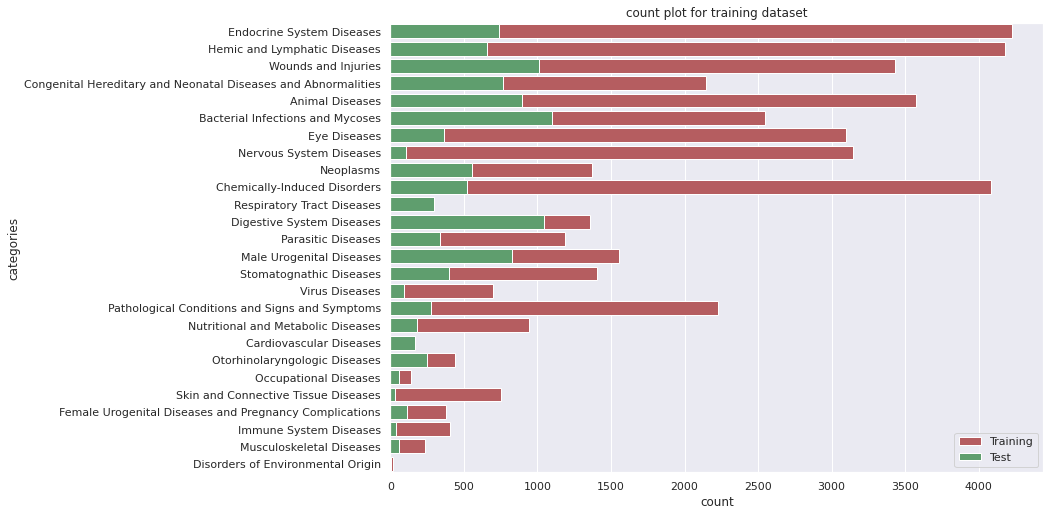

In [8]:
#Check Training data nnd test data proportion
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y="categories", data=df_train, label='Training', color='r')
sns.countplot(y="categories", data=df_test, label='Test',color='g')
plt.title('count plot for training dataset')
plt.legend()
plt.show()

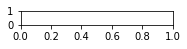

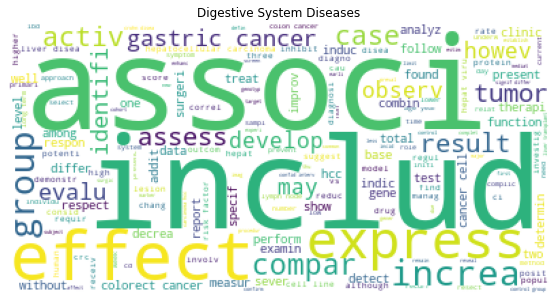

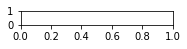

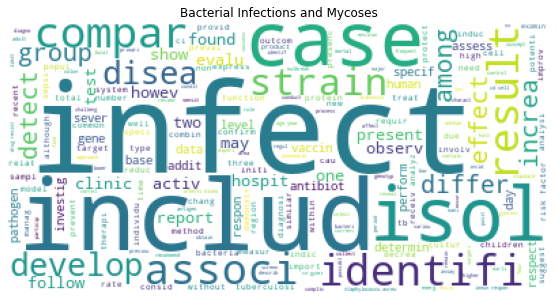

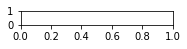

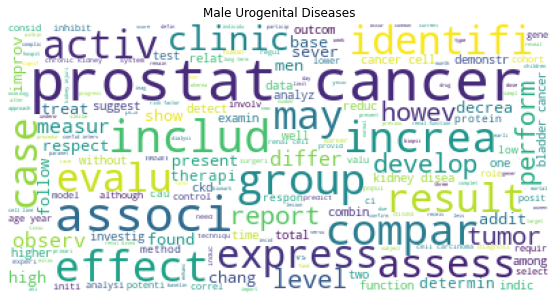

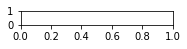

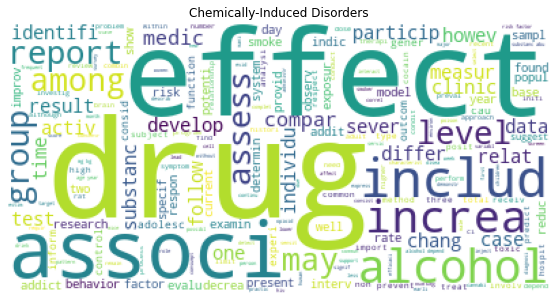

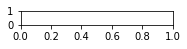

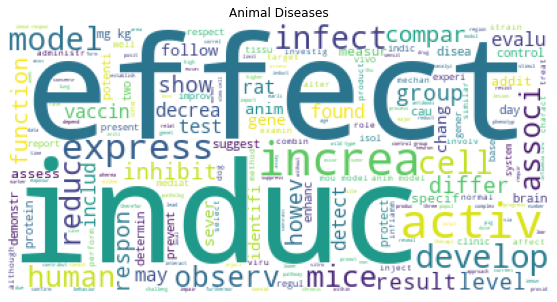

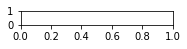

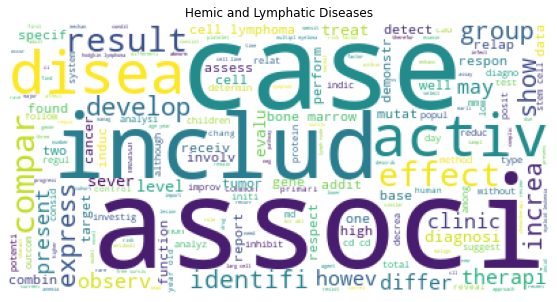

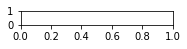

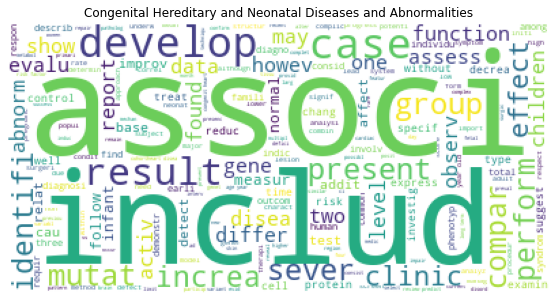

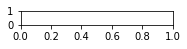

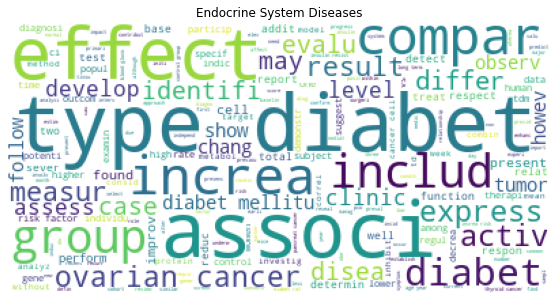

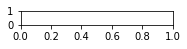

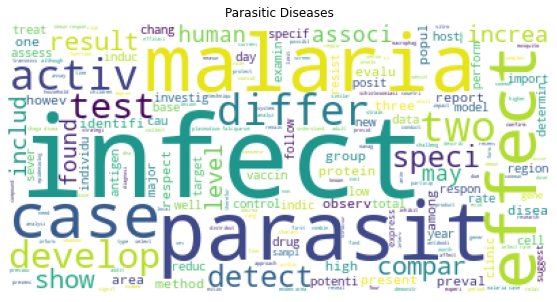

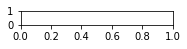

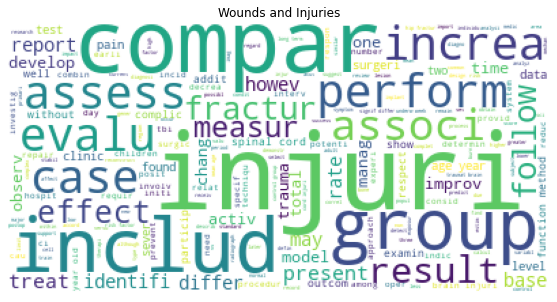

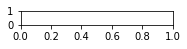

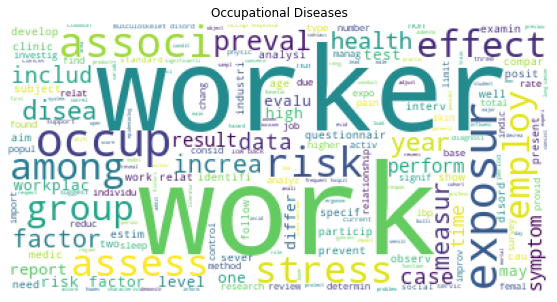

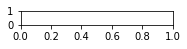

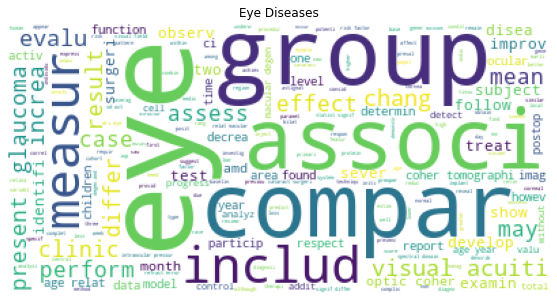

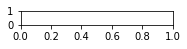

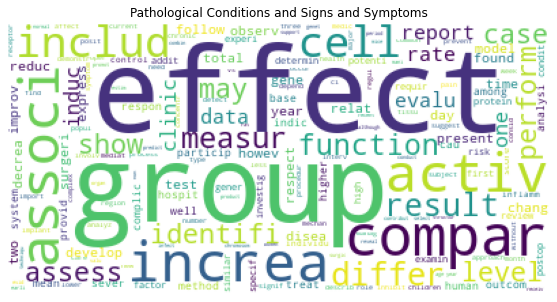

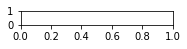

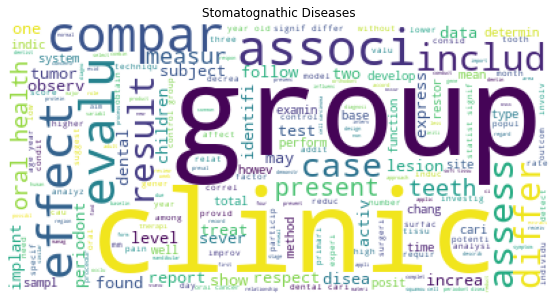

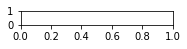

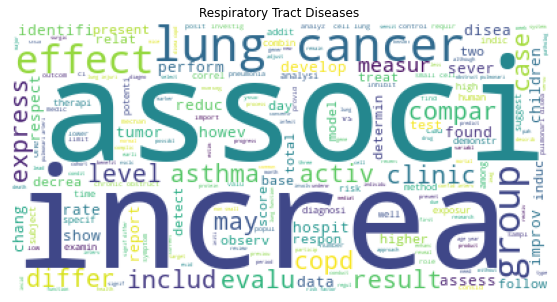

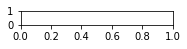

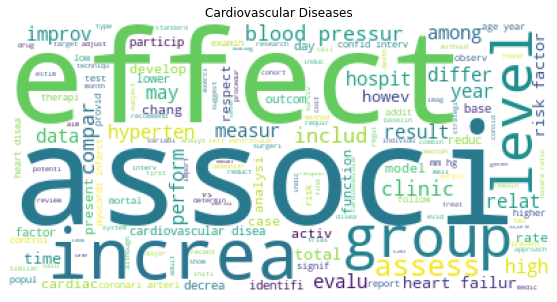

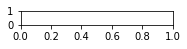

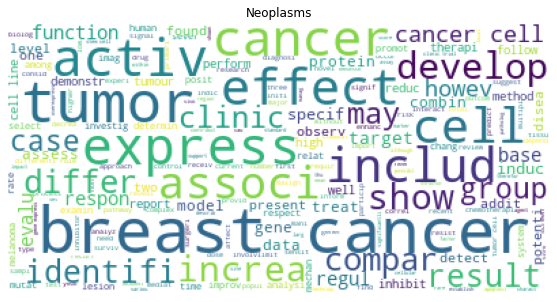

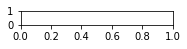

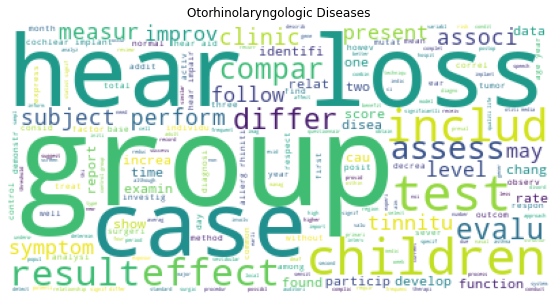

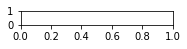

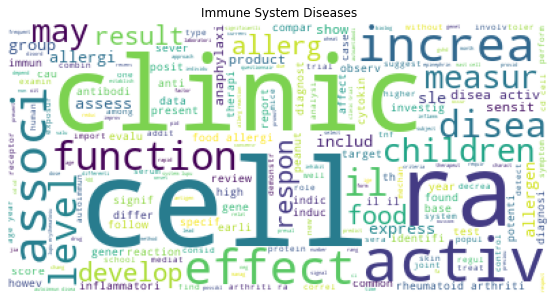

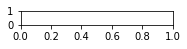

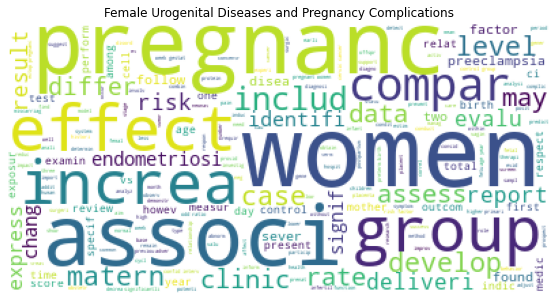

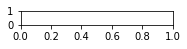

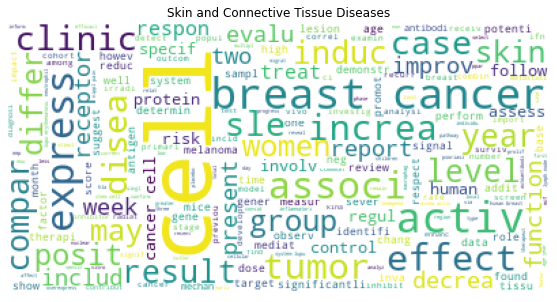

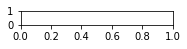

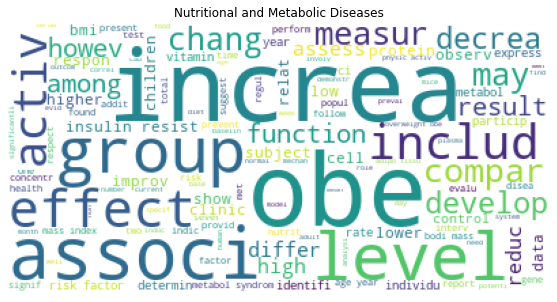

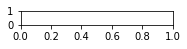

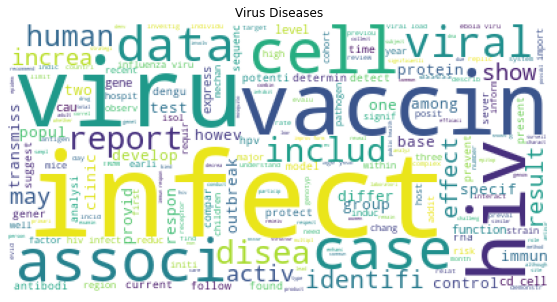

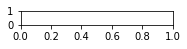

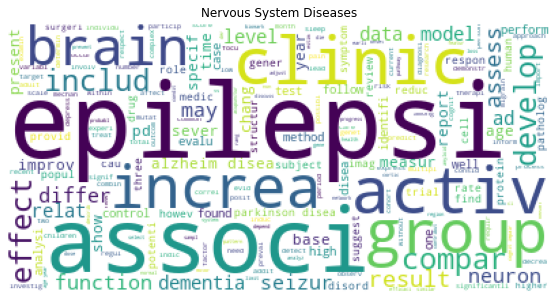

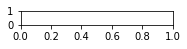

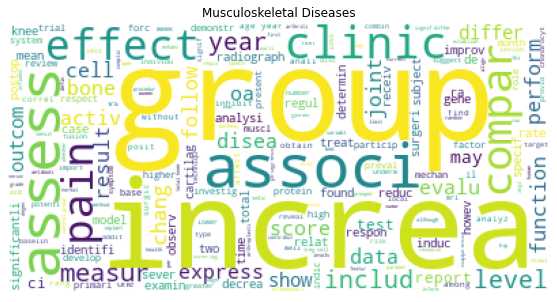

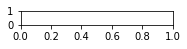

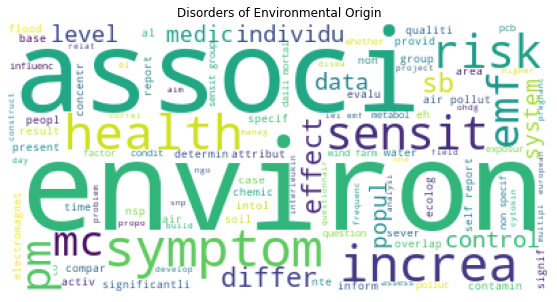

In [50]:
#World cloud plot the see the different word frequecy for each category
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

for i, category in enumerate(df_train['categories'].unique()):
  text = str(list(df_train[df_train['categories']==category]['abstract']))
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white"
                      ).generate(text)
  plt.subplot(13,2,i+1)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(category)
  plt.show()

In [39]:
#check n-gram for each category
from nltk import ngrams
from nltk import FreqDist

Ngrams = ngrams(str(list(df_train[df_train['categories']=='Digestive System Diseases']['abstract'])).split(), 1)
fdist = FreqDist(Ngrams)
ngram_list = []
freq = []

for k,v in fdist.items():
    ngram_list.append(k)
    freq.append(v)
    
ngram_list = pd.DataFrame(ngram_list)
freq = pd.DataFrame(freq)
freq = freq.rename(columns={0: "frequency"})
Ngram = pd.concat([ngram_list, freq], axis=1, sort=False)
result_ngram = Ngram.sort_values(by=['frequency'], ascending=False)
result_ngram


0  frequency
29        patient      10790
209          cell       4781
11         cancer       4439
179         studi       4375
158           use       3719
...           ...        ...
12758    bacterin          1
12757  hyperimmun          1
12756    metacarp          1
12755    cartilag          1
20374    infant']          1

[20375 rows x 2 columns]

In [9]:
#Data cleaning process

porter_stemmer = PorterStemmer()

def data_cleaning(text):
        
    stop = set(stopwords.words('english'))
    stop = stop.union(['patient','use','studi','treatment']) 
    lemma = WordNetLemmatizer()   
    stop_free = " ".join([i for i in str(text).lower().split() if i not in stop])
    underscore = re.sub('_',' ',stop_free)                                             #Replace underscore with space
    punc_free = re.sub('[%s]' % re.escape(string.punctuation +r'“'+'”'+'’'+"'"), ' ', underscore) 
    num_free = re.sub('[^a-z ]','',str(punc_free))
    normalized = " ".join(porter_stemmer.stem(word) for word in num_free.split())
    short_word = ' '.join(word for word in normalized.split() if len(word)>1)
    long_word = ' '.join(word for word in short_word.split() if len(word)<15)
    return long_word
data_clean = lambda x: data_cleaning(x)

In [10]:
#Clean Training and test data
df_train['abstract'] = df_train['abstract'].apply(data_clean)
df_test['abstract'] = df_test['abstract'].apply(data_clean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  




# Exercise 3

a. Build a model using machine learning algorithm to train a multi-class text classifier

In [11]:
#Creating Document vector Structure
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)

In [12]:
data_cv = vectorizer.fit_transform(df_train['abstract'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=vectorizer.get_feature_names())
data_dtm.index = df_train.index
data_dtm

aa  aaa  aac  aav   ab  ...   zr   zs   zu  zusanli  zymographi
0      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
1      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
2      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
3      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
4      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...      ...         ...
43967  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
43968  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
43969  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
43970  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
43971  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0

[43972 rows x 10000 columns]

In [13]:
test_cv = vectorizer.transform(df_test['abstract'])
test_dtm = pd.DataFrame(test_cv.toarray(), columns=vectorizer.get_feature_names())
test_dtm.index = df_test.index
test_dtm

aa  aaa  aac  aav   ab  ...   zr   zs   zu  zusanli  zymographi
0      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
1      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
2      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
3      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
4      0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...      ...         ...
10868  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
10869  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
10870  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
10871  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0
10872  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0      0.0         0.0

[10873 rows x 10000 columns]

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
lsvc = LinearSVC()

#models = [('multinomialnv',mnb),('Randomforest', rfc), ('xgboost',xgb), ('LinearSVC',lsvc)]
models = [('LinearSVC',lsvc)]

for name, model in models:
  model.fit(data_dtm, df_train['categories'])
  y_pred = model.predict(test_dtm)
  print(f"Accuracy for model {name} : {accuracy_score(df_test['categories'],y_pred)}")



Accuracy for model LinearSVC : 0.7533339464729145


In [35]:
from sklearn.metrics import classification_report
print(classification_report(df_test['categories'], y_pred))

                                                               precision    recall  f1-score   support

                                              Animal Diseases       0.68      0.69      0.68       896
                             Bacterial Infections and Mycoses       0.80      0.83      0.82      1100
                                      Cardiovascular Diseases       0.49      0.44      0.47       170
                                 Chemically-Induced Disorders       0.79      0.81      0.80       521
Congenital Hereditary and Neonatal Diseases and Abnormalities       0.71      0.73      0.72       766
                                    Digestive System Diseases       0.80      0.85      0.82      1047
                            Disorders of Environmental Origin       0.00      0.00      0.00         5
                                    Endocrine System Diseases       0.82      0.81      0.82       738
                                                 Eye Diseases       0.82

In [40]:
#Predict category after taking abstract as a string.
def predict_diseases(text):
  text = [text]
  x = vectorizer.transform(txt)
  result = model.predict(x)
  return result


In [42]:
text_data = df_test['abstract'][1]
print(f'input text: {text_data}')
print(f'predicted category: {predict_diseases(text_data)}')

input text: vitamin relat cardiovascular diseas cancer risk howev data total mortal scarc aim present studi assess associ dietari intak differ type vitamin mortal mediterranean popul high cardiovascular diseas risk prospect cohort analysi conduct particip predim prevencin con dieta mediterrnea studi median follow up energi nutrient intak evalu use valid item food frequenc questionnair dietari vitamin intak calcul annual use usda food composit databas publish sourc death ascertain end point adjud committe unawar dietari habit particip review medic record link nation death index cox proport hazard model fit assess rr mortal energi adjust baselin dietari phylloquinon intak invers associ significantli reduc risk cancer all caus mortal control potenti confound hr ci hr ci respect longitudin assess individu increas intak phylloquinon menaquinon follow up lower risk cancer hr ci hr ci respect all caus mortal hr ci hr ci respect individu decreas chang intak also individu increas intak dietari 

b. I have choosed accuracy score to evaluate my model. As we can see from above classification report, we are getting upto 89 % accuracy for category like Parasitic Diseases but at the same time we are getting poor accuracy for skin and Connective Tissue Diseases.

c. We are getting more than 75% accuracy with ML algorithm LinerSVC. Acuracy is less then 70 % for other algorithms like Random Forest, Navie Bias and XGBoost. So, i choosed LinerSVC algorithm. Although accuracy can be increase using hyperparameter tunning. 